# Diabetic Analysis

Importing libraries

In [ ]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

## Data Understanding

In [ ]:
#read the csv
df = pd.read_csv("/Users/victoriatran/Downloads/diabetes_dataset00.csv")
df.head()

,Target,Genetic Markers,Autoantibodies,Family History,Environmental Factors,Insulin Levels,Age,BMI,Physical Activity,Dietary Habits,...,Pulmonary Function,Cystic Fibrosis Diagnosis,Steroid Use History,Genetic Testing,Neurological Assessments,Liver Function Tests,Digestive Enzyme Levels,Urine Test,Birth Weight,Early Onset Symptoms
0,Steroid-Induced Diabetes,Positive,Negative,No,Present,40,44,38,High,Healthy,...,76,No,No,Positive,3,Normal,56,Ketones Present,2629,No
1,Neonatal Diabetes Mellitus (NDM),Positive,Negative,No,Present,13,1,17,High,Healthy,...,60,Yes,No,Negative,1,Normal,28,Glucose Present,1881,Yes
2,Prediabetic,Positive,Positive,Yes,Present,27,36,24,High,Unhealthy,...,80,Yes,No,Negative,1,Abnormal,55,Ketones Present,3622,Yes
3,Type 1 Diabetes,Negative,Positive,No,Present,8,7,16,Low,Unhealthy,...,89,Yes,No,Positive,2,Abnormal,60,Ketones Present,3542,No
4,Wolfram Syndrome,Negative,Negative,Yes,Present,17,10,17,High,Healthy,...,41,No,No,Positive,1,Normal,24,Protein Present,1770,No


In [ ]:
#explore data features
df.columns

Index(['Target', 'Genetic Markers', 'Autoantibodies', 'Family History',
       'Environmental Factors', 'Insulin Levels', 'Age', 'BMI',
       'Physical Activity', 'Dietary Habits', 'Blood Pressure',
       'Cholesterol Levels', 'Waist Circumference', 'Blood Glucose Levels',
       'Ethnicity', 'Socioeconomic Factors', 'Smoking Status',
       'Alcohol Consumption', 'Glucose Tolerance Test', 'History of PCOS',
       'Previous Gestational Diabetes', 'Pregnancy History',
       'Weight Gain During Pregnancy', 'Pancreatic Health',
       'Pulmonary Function', 'Cystic Fibrosis Diagnosis',
       'Steroid Use History', 'Genetic Testing', 'Neurological Assessments',
       'Liver Function Tests', 'Digestive Enzyme Levels', 'Urine Test',
       'Birth Weight', 'Early Onset Symptoms'],
      dtype='object')

In [ ]:
#explore different types of diabetes
df['Target'].unique()

array(['Steroid-Induced Diabetes', 'Neonatal Diabetes Mellitus (NDM)',
       'Prediabetic', 'Type 1 Diabetes', 'Wolfram Syndrome', 'LADA',
       'Type 2 Diabetes', 'Wolcott-Rallison Syndrome',
       'Secondary Diabetes', 'Type 3c Diabetes (Pancreatogenic Diabetes)',
       'Gestational Diabetes', 'Cystic Fibrosis-Related Diabetes (CFRD)',
       'MODY'], dtype=object)

In [ ]:
#view categorical columns
df.dtypes

Target                           object
Genetic Markers                  object
Autoantibodies                   object
Family History                   object
Environmental Factors            object
Insulin Levels                    int64
Age                               int64
BMI                               int64
Physical Activity                object
Dietary Habits                   object
Blood Pressure                    int64
Cholesterol Levels                int64
Waist Circumference               int64
Blood Glucose Levels              int64
Ethnicity                        object
Socioeconomic Factors            object
Smoking Status                   object
Alcohol Consumption              object
Glucose Tolerance Test           object
History of PCOS                  object
Previous Gestational Diabetes    object
Pregnancy History                object
Weight Gain During Pregnancy      int64
Pancreatic Health                 int64
Pulmonary Function                int64


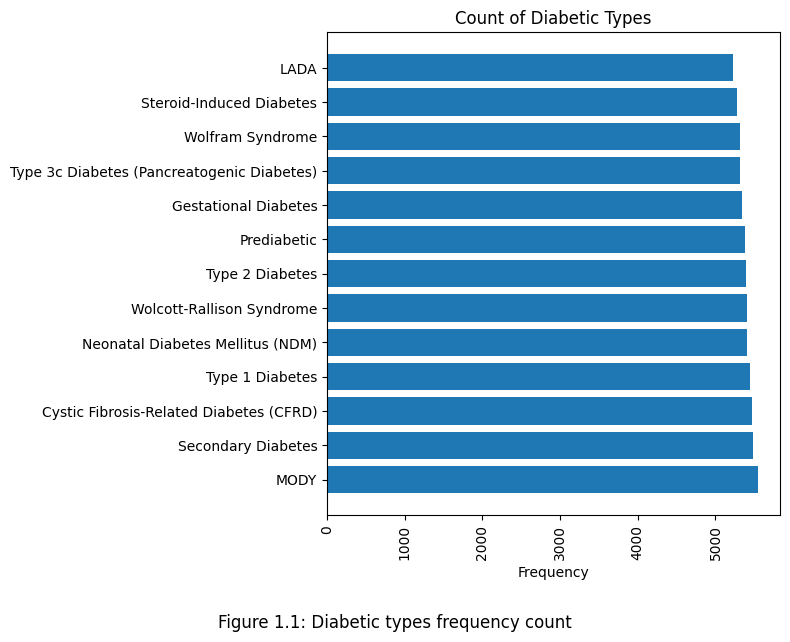

In [ ]:
#view the frequency
df['Target'].value_counts()

#graph the frequency of the target
plt.figure(figsize=(8, 6))
plt.barh(df['Target'].value_counts().index, df['Target'].value_counts().values)
# Add a suptitle below the figure
plt.gcf().suptitle("Figure 1.1: Diabetic types frequency count",
                   fontsize=12, y=-0.05, ha='center', color='black')  # Adjust `y` for placement below

# Adjust layout to make space for the caption
plt.tight_layout(rect=[0, 0.05, 1, 1])  # Make space for the caption at the bottom
plt.xticks(rotation=90)
plt.xlabel('Frequency')
plt.title('Count of Diabetic Types')
plt.show()

Descriptive statistics

In [ ]:
#descriptive stats for interested variables
columns = ['Age', 'BMI', 'Blood Pressure', 'Cholesterol Levels', 'Blood Glucose Levels', 'Insulin Levels']
df[columns].describe()


,Age,BMI,Blood Pressure,Cholesterol Levels,Blood Glucose Levels,Insulin Levels
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,32.020700,24.782943,111.339543,194.867200,160.701657,21.607443
std,21.043173,6.014236,19.945000,44.532466,48.165547,10.785852
min,0.000000,12.000000,60.000000,100.000000,80.000000,5.000000
25%,14.000000,20.000000,99.000000,163.000000,121.000000,13.000000
50%,31.000000,25.000000,113.000000,191.000000,152.000000,19.000000
75%,49.000000,29.000000,125.000000,225.000000,194.000000,28.000000
max,79.000000,39.000000,149.000000,299.000000,299.000000,49.000000


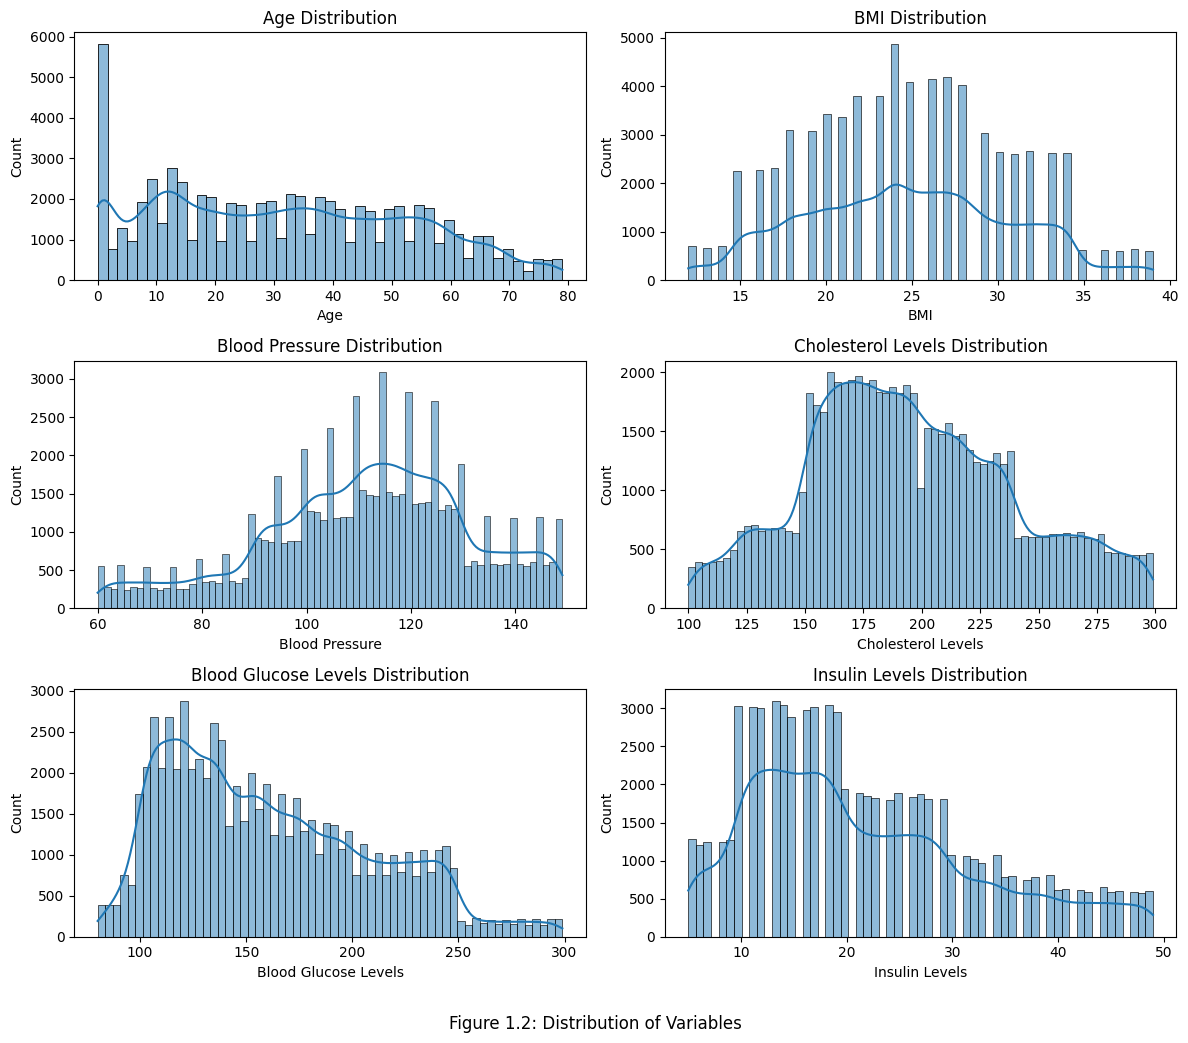

In [ ]:
#plot the distribution of the variables in one plot
plt.figure(figsize=(12, 10))
plt.subplot(3, 2, 1)
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.subplot(3, 2, 2)
sns.histplot(df['BMI'], kde=True)
plt.title('BMI Distribution')
plt.subplot(3, 2, 3)
sns.histplot(df['Blood Pressure'], kde=True)
plt.title('Blood Pressure Distribution')
plt.subplot(3, 2, 4)
sns.histplot(df['Cholesterol Levels'], kde=True)
plt.title('Cholesterol Levels Distribution')
plt.subplot(3, 2, 5)
sns.histplot(df['Blood Glucose Levels'], kde=True)
plt.title('Blood Glucose Levels Distribution')
plt.subplot(3, 2, 6)
sns.histplot(df['Insulin Levels'], kde=True)
plt.title('Insulin Levels Distribution')
plt.tight_layout()

#add title for the figure
plt.suptitle("Figure 1.2: Distribution of Variables", fontsize=12, y=-0.02, ha='center', color='black')

plt.show()

So it looks like the dataset is balanced with the similar amount of counts for each target variable/type.

In [ ]:
#i want to see what kind of diabetic for age 1
df[df['Age'] == 1]['Target'].value_counts()

Target
Neonatal Diabetes Mellitus (NDM)    2753
Wolcott-Rallison Syndrome            412
Name: count, dtype: int64

The distribution of age is interesting to see that great amount of our dataset is recorded for age 1 with Neonatal Diabetes Mellitus (NDM) condition

Dietary Habits
Healthy      35020
Unhealthy    34980
Name: count, dtype: int64


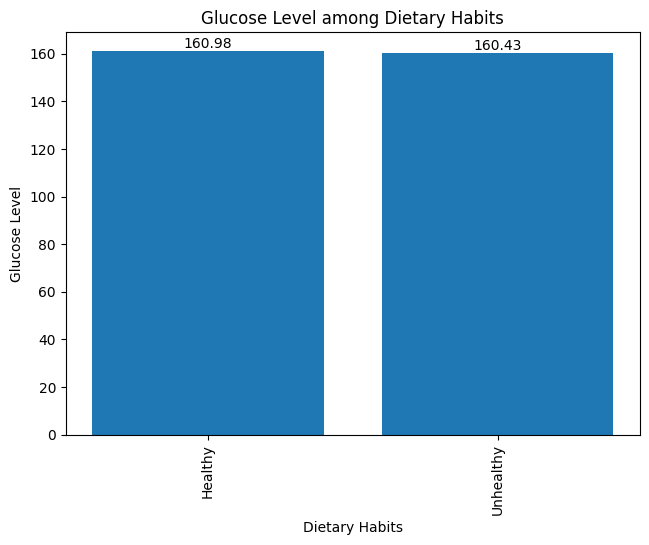

In [ ]:
#display glucose level among the different dietary habits
print(df['Dietary Habits'].value_counts())

# Calculate the mean glucose level for each dietary habit
mean_glucose_levels = df.groupby('Dietary Habits')['Blood Glucose Levels'].mean()

#graph the glucose level among the different dietary habits
plt.bar(mean_glucose_levels.index, mean_glucose_levels.values)

#display values on the bar chart
for i, v in enumerate(mean_glucose_levels.values):
    plt.text(i, v, round(v, 2), ha='center', va='bottom')
# Adjust layout to make space for the caption
plt.tight_layout(rect=[0, 0.05, 1, 1])  # Make space for the caption at the bottom
plt.xticks(rotation=90)
plt.xlabel('Dietary Habits')
plt.ylabel('Glucose Level')
plt.title('Glucose Level among Dietary Habits')
plt.show()

Genetic Markers
Positive    35101
Negative    34899
Name: count, dtype: int64


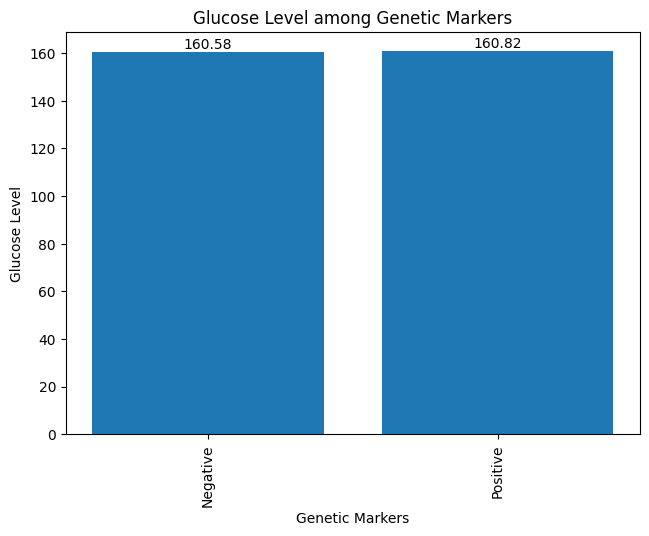

In [ ]:
#display the glucose level among the different genetic markers
print(df['Genetic Markers'].value_counts())

# Calculate the mean glucose level for each genetic marker
mean_glucose_levels = df.groupby('Genetic Markers')['Blood Glucose Levels'].mean()

#graph the glucose level among the different genetic markers
plt.bar(mean_glucose_levels.index, mean_glucose_levels.values)

#display values on the bar chart
for i, v in enumerate(mean_glucose_levels.values):
    plt.text(i, v, round(v, 2), ha='center', va='bottom')
# Adjust layout to make space for the caption
plt.tight_layout(rect=[0, 0.05, 1, 1])  # Make space for the caption at the bottom
plt.xticks(rotation=90)
plt.xlabel('Genetic Markers')
plt.ylabel('Glucose Level')
plt.title('Glucose Level among Genetic Markers')
plt.show()

[TODO:FIX] DO SOME KIND OF RESEARCH TO EXPLORE WHAT THESE DIABETIC ARE AND HOW THEY CAN AFFECT BLINDNESS

Write something about the data and what we are going to use it for...

[TODO:FIX] SEVERITY OF DIABETIC TYPE

###Descriptive stats

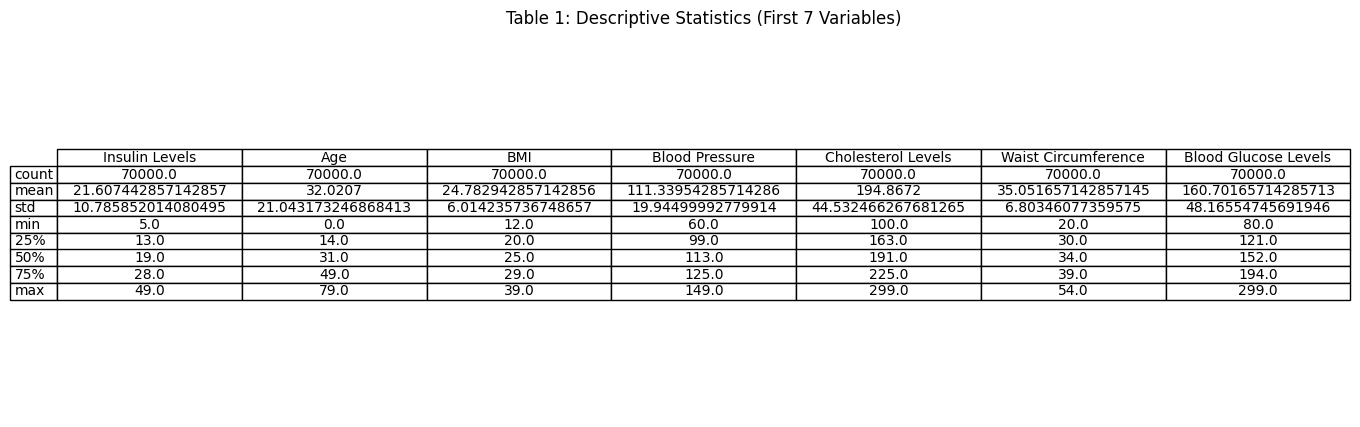

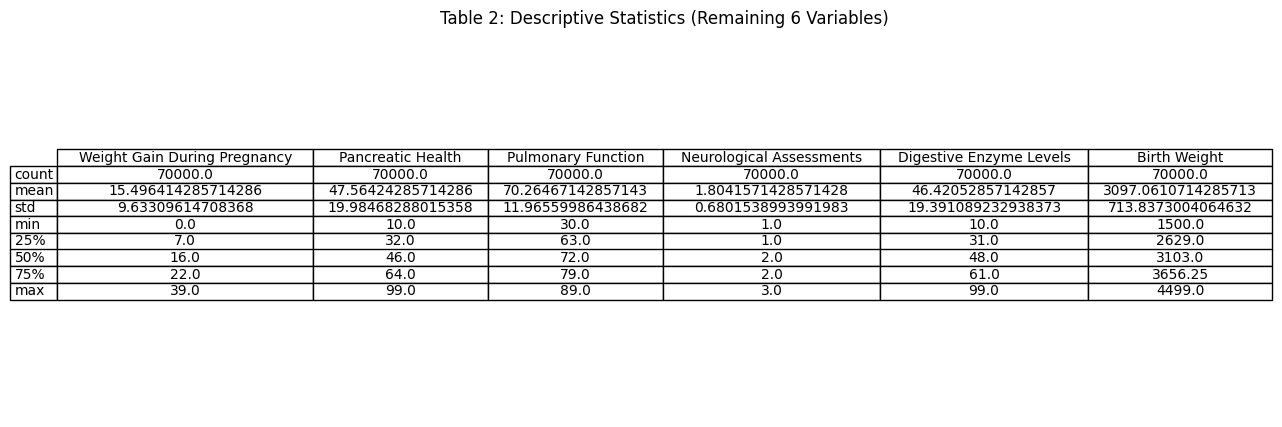

In [ ]:
#descriptive analysis for numerical variables
desc_stats = df.describe()

# Split the columns into two parts
columns1 = desc_stats.iloc[:, :7]  # First 7 columns
columns2 = desc_stats.iloc[:, 7:]  # Remaining 6 columns

# Plot the first table
plt.figure(figsize=(8, 5))
plt.axis('off')
table1 = plt.table(cellText=columns1.values,
                   colLabels=columns1.columns,
                   rowLabels=columns1.index,
                   loc='center',
                   cellLoc='center')
table1.auto_set_font_size(False)
table1.set_fontsize(10)
table1.auto_set_column_width(col=list(range(len(columns1.columns))))
plt.title("Table 1: Descriptive Statistics (First 7 Variables)", fontsize=12)
plt.show()

# Plot the second table
plt.figure(figsize=(8, 5))
plt.axis('off')
table2 = plt.table(cellText=columns2.values,
                   colLabels=columns2.columns,
                   rowLabels=columns2.index,
                   loc='center',
                   cellLoc='center')
table2.auto_set_font_size(False)
table2.set_fontsize(10)
table2.auto_set_column_width(col=list(range(len(columns2.columns))))
plt.title("Table 2: Descriptive Statistics (Remaining 6 Variables)", fontsize=12)
plt.show()



# Data Preprocessing


Drop missing/null and duplicates

In [ ]:
#drop any missing or null values
df.dropna(inplace=True)
df.shape

(70000, 34)

In [ ]:
#drop any duplicates
df.drop_duplicates(inplace=True)
df.shape

(70000, 34)

Selecting features and target variables

In [ ]:
#specify features and target
features = df.drop('Target', axis=1)
target = df['Target']

In [ ]:
features_int = features.select_dtypes(include=['int64', 'float64'])
features_int

,Insulin Levels,Age,BMI,Blood Pressure,Cholesterol Levels,Waist Circumference,Blood Glucose Levels,Weight Gain During Pregnancy,Pancreatic Health,Pulmonary Function,Neurological Assessments,Digestive Enzyme Levels,Birth Weight
0,40,44,38,124,201,50,168,18,36,76,3,56,2629
1,13,1,17,73,121,24,178,8,26,60,1,28,1881
2,27,36,24,121,185,36,105,15,56,80,1,55,3622
3,8,7,16,100,151,29,121,12,49,89,2,60,3542
4,17,10,17,103,146,33,289,2,10,41,1,24,1770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,24,38,35,128,299,40,227,24,31,71,2,34,2575
69996,21,51,31,125,160,44,149,15,69,82,1,58,3002
69997,18,11,15,105,153,31,143,23,39,77,2,53,3593
69998,32,30,24,111,177,33,126,21,53,70,1,35,2592


Assessing Multi-colinearity

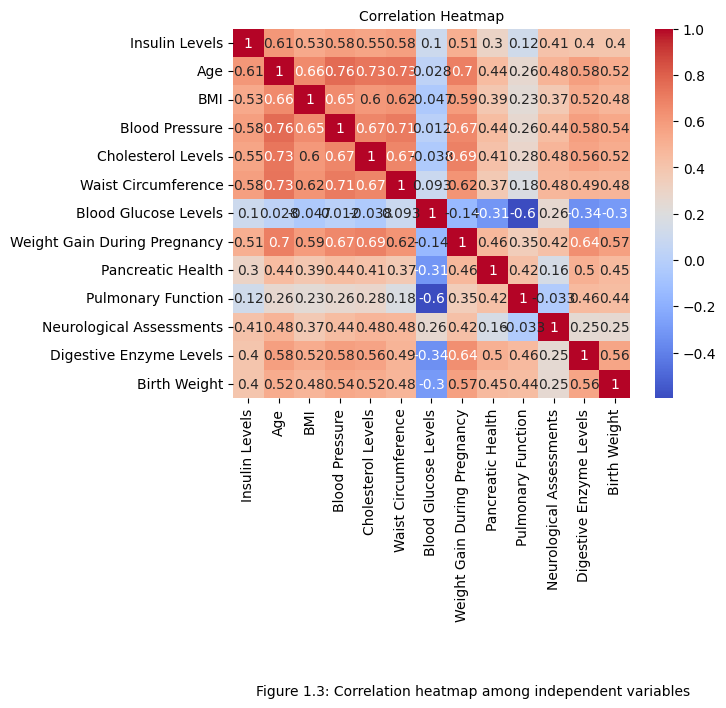

In [ ]:
sns_heatmap = sns.heatmap(features_int.corr(), annot=True, cmap='coolwarm')
sns_heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':10})

#prevent the heatmap from stacking
plt.size = (50,50)

# Adding a figure caption
plt.figtext(0.5, -0.5, 'Figure 1.3: Correlation heatmap among independent variables', ha='center', va='center', fontsize=10)

plt.show()

Dummy encoding

In [ ]:
#recode categorical columns to dummy coding with dtypes of object
features_dummy = features.drop(columns=features.select_dtypes(include=['int64', 'float64']).columns)
features_dummy

#recode dummy features as dummy coding as type int
features_dummy = pd.get_dummies(features_dummy, drop_first=True).astype(int)
features_dummy

,Genetic Markers_Positive,Autoantibodies_Positive,Family History_Yes,Environmental Factors_Present,Physical Activity_Low,Physical Activity_Moderate,Dietary Habits_Unhealthy,Ethnicity_Low Risk,Socioeconomic Factors_Low,Socioeconomic Factors_Medium,...,Previous Gestational Diabetes_Yes,Pregnancy History_Normal,Cystic Fibrosis Diagnosis_Yes,Steroid Use History_Yes,Genetic Testing_Positive,Liver Function Tests_Normal,Urine Test_Ketones Present,Urine Test_Normal,Urine Test_Protein Present,Early Onset Symptoms_Yes
0,1,0,0,1,0,0,0,1,0,1,...,0,1,0,0,1,1,1,0,0,0
1,1,0,0,1,0,0,0,1,0,0,...,0,1,1,0,0,1,0,0,0,1
2,1,1,1,1,0,0,1,1,0,1,...,0,1,1,0,0,0,1,0,0,1
3,0,1,0,1,1,0,1,1,0,0,...,1,1,1,0,1,0,1,0,0,0
4,0,0,1,1,0,0,0,1,1,0,...,1,0,0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,1,1,0,0,1,1,0,0,...,0,1,1,1,1,0,0,1,0,0
69996,1,1,0,0,1,0,1,1,0,1,...,0,1,1,1,0,0,1,0,0,0
69997,1,0,0,0,1,0,1,1,0,0,...,0,1,1,1,1,1,0,0,1,0
69998,1,0,0,0,0,0,0,0,1,0,...,0,1,0,0,1,0,1,0,0,1


In [ ]:
#merge the dummies with the features with dtype int
features = pd.concat([features_int, features_dummy], axis=1)
features

,Insulin Levels,Age,BMI,Blood Pressure,Cholesterol Levels,Waist Circumference,Blood Glucose Levels,Weight Gain During Pregnancy,Pancreatic Health,Pulmonary Function,...,Previous Gestational Diabetes_Yes,Pregnancy History_Normal,Cystic Fibrosis Diagnosis_Yes,Steroid Use History_Yes,Genetic Testing_Positive,Liver Function Tests_Normal,Urine Test_Ketones Present,Urine Test_Normal,Urine Test_Protein Present,Early Onset Symptoms_Yes
0,40,44,38,124,201,50,168,18,36,76,...,0,1,0,0,1,1,1,0,0,0
1,13,1,17,73,121,24,178,8,26,60,...,0,1,1,0,0,1,0,0,0,1
2,27,36,24,121,185,36,105,15,56,80,...,0,1,1,0,0,0,1,0,0,1
3,8,7,16,100,151,29,121,12,49,89,...,1,1,1,0,1,0,1,0,0,0
4,17,10,17,103,146,33,289,2,10,41,...,1,0,0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,24,38,35,128,299,40,227,24,31,71,...,0,1,1,1,1,0,0,1,0,0
69996,21,51,31,125,160,44,149,15,69,82,...,0,1,1,1,0,0,1,0,0,0
69997,18,11,15,105,153,31,143,23,39,77,...,0,1,1,1,1,1,0,0,1,0
69998,32,30,24,111,177,33,126,21,53,70,...,0,1,0,0,1,0,1,0,0,1


In [ ]:
features.columns

Index(['Insulin Levels', 'Age', 'BMI', 'Blood Pressure', 'Cholesterol Levels',
       'Waist Circumference', 'Blood Glucose Levels',
       'Weight Gain During Pregnancy', 'Pancreatic Health',
       'Pulmonary Function', 'Neurological Assessments',
       'Digestive Enzyme Levels', 'Birth Weight', 'Genetic Markers_Positive',
       'Autoantibodies_Positive', 'Family History_Yes',
       'Environmental Factors_Present', 'Physical Activity_Low',
       'Physical Activity_Moderate', 'Dietary Habits_Unhealthy',
       'Ethnicity_Low Risk', 'Socioeconomic Factors_Low',
       'Socioeconomic Factors_Medium', 'Smoking Status_Smoker',
       'Alcohol Consumption_Low', 'Alcohol Consumption_Moderate',
       'Glucose Tolerance Test_Normal', 'History of PCOS_Yes',
       'Previous Gestational Diabetes_Yes', 'Pregnancy History_Normal',
       'Cystic Fibrosis Diagnosis_Yes', 'Steroid Use History_Yes',
       'Genetic Testing_Positive', 'Liver Function Tests_Normal',
       'Urine Test_Ketones Pre

Feature selection

In [ ]:
#dropping irrelevant features
features = features.drop(['Age', 'Waist Circumference','Weight Gain During Pregnancy', 'Pulmonary Function','Neurological Assessments', 'Birth Weight',
                          'Autoantibodies_Positive','Glucose Tolerance Test_Normal','History of PCOS_Yes','Cystic Fibrosis Diagnosis_Yes','Liver Function Tests_Normal','Urine Test_Ketones Present', 'Urine Test_Normal',
       'Urine Test_Protein Present'], axis=1)

features.columns

Index(['Insulin Levels', 'BMI', 'Blood Pressure', 'Cholesterol Levels',
       'Blood Glucose Levels', 'Pancreatic Health', 'Digestive Enzyme Levels',
       'Genetic Markers_Positive', 'Family History_Yes',
       'Environmental Factors_Present', 'Physical Activity_Low',
       'Physical Activity_Moderate', 'Dietary Habits_Unhealthy',
       'Ethnicity_Low Risk', 'Socioeconomic Factors_Low',
       'Socioeconomic Factors_Medium', 'Smoking Status_Smoker',
       'Alcohol Consumption_Low', 'Alcohol Consumption_Moderate',
       'Previous Gestational Diabetes_Yes', 'Pregnancy History_Normal',
       'Steroid Use History_Yes', 'Genetic Testing_Positive',
       'Early Onset Symptoms_Yes'],
      dtype='object')

###Target encoding

In [ ]:
# #encoding target variable
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# target_encoded = le.fit_transform(target)
# print(target_encoded)

In [ ]:
# # Print the encoded target labels
# print("Encoded Target Labels:")
# print(target_encoded)

# # Print the mapping of original labels to encoded labels
# print("\nOriginal Labels to Encoded Labels Mapping:")
# for original, encoded in zip(le.classes_, range(len(le.classes_))):
#     print(f'{original}: {encoded}')

In [ ]:
#combine target and features
full_data = pd.concat([features, pd.Series(target, name='Target')], axis=1)
full_data.head()

,Insulin Levels,BMI,Blood Pressure,Cholesterol Levels,Blood Glucose Levels,Pancreatic Health,Digestive Enzyme Levels,Genetic Markers_Positive,Family History_Yes,Environmental Factors_Present,...,Socioeconomic Factors_Medium,Smoking Status_Smoker,Alcohol Consumption_Low,Alcohol Consumption_Moderate,Previous Gestational Diabetes_Yes,Pregnancy History_Normal,Steroid Use History_Yes,Genetic Testing_Positive,Early Onset Symptoms_Yes,Target
0,40,38,124,201,168,36,56,1,0,1,...,1,1,0,0,0,1,0,1,0,Steroid-Induced Diabetes
1,13,17,73,121,178,26,28,1,0,1,...,0,0,0,1,0,1,0,0,1,Neonatal Diabetes Mellitus (NDM)
2,27,24,121,185,105,56,55,1,1,1,...,1,1,0,0,0,1,0,0,1,Prediabetic
3,8,16,100,151,121,49,60,0,0,1,...,0,1,0,1,1,1,0,1,0,Type 1 Diabetes
4,17,17,103,146,289,10,24,0,1,1,...,0,1,0,1,1,0,0,1,0,Wolfram Syndrome


In [ ]:
#selecting our features and target
features = full_data.drop('Target', axis=1)
target = full_data['Target']

split data

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Data Modeling

In [ ]:
from re import X
#standardize values to even out the weight of each predictor
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

##Tuning - machine learning (grid search)
##Tuning - neural net (batches / epoches)

### Decision Tree

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier()

#parameter for tuning
param_grid={
    'max_depth': list(range(1,11)),
    'min_samples_split':list(range(2,11)),
    'min_samples_leaf':list(range(1,10)),
    'min_impurity_decrease':[0.0001, 0.009, 0.001, 0.01]

}

#search for the best tree
grid_search = GridSearchCV(tree_model, param_grid=param_grid)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)

best_tree = grid_search.best_estimator_

{'max_depth': 10, 'min_impurity_decrease': 0.0001, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.7249642857142857


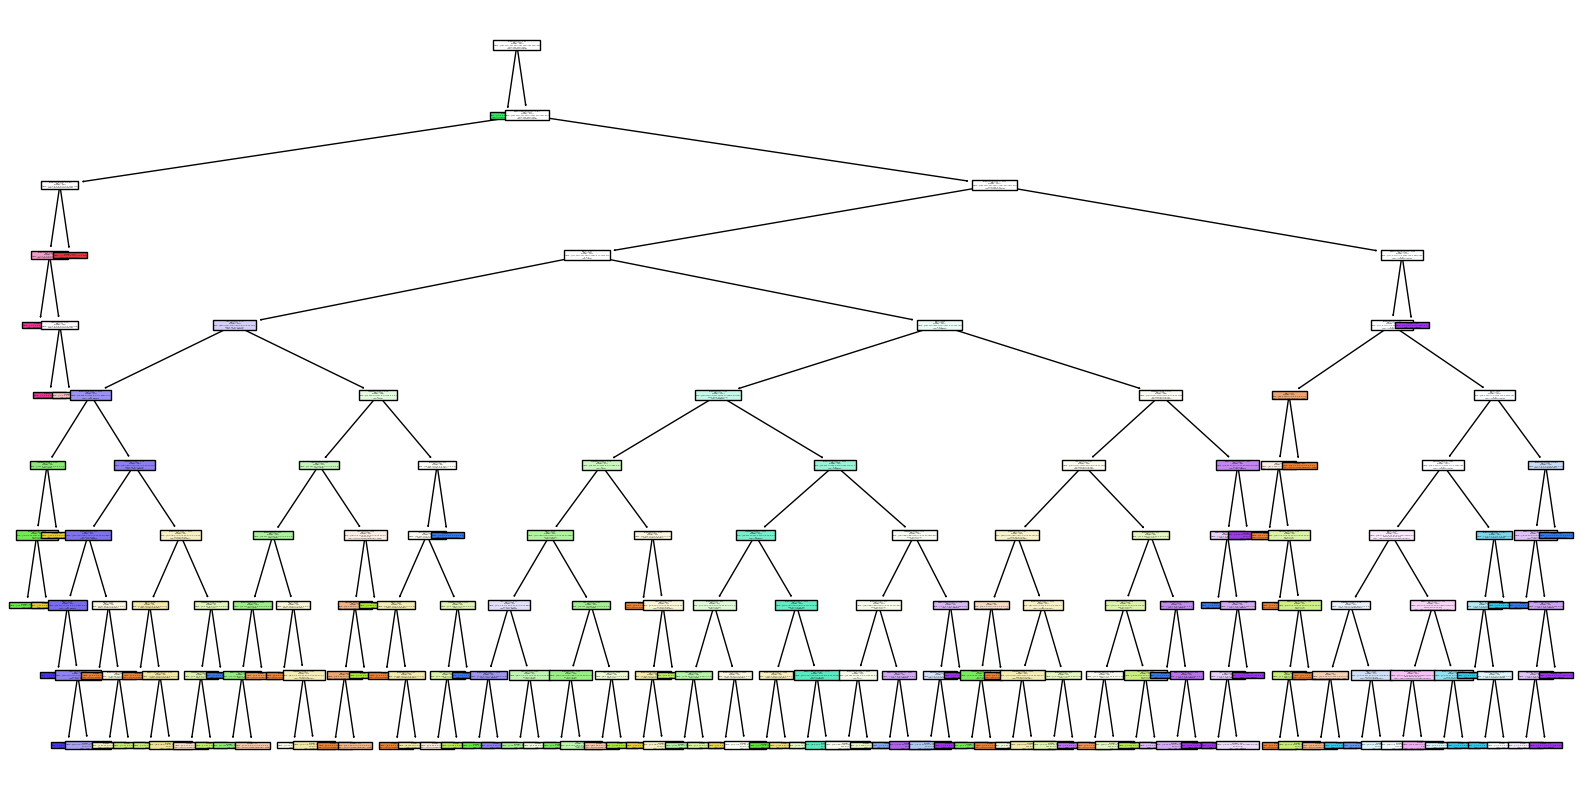

In [ ]:
#graph the tree
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(best_tree, feature_names=features.columns, class_names=best_tree.classes_, filled=True)
plt.show()

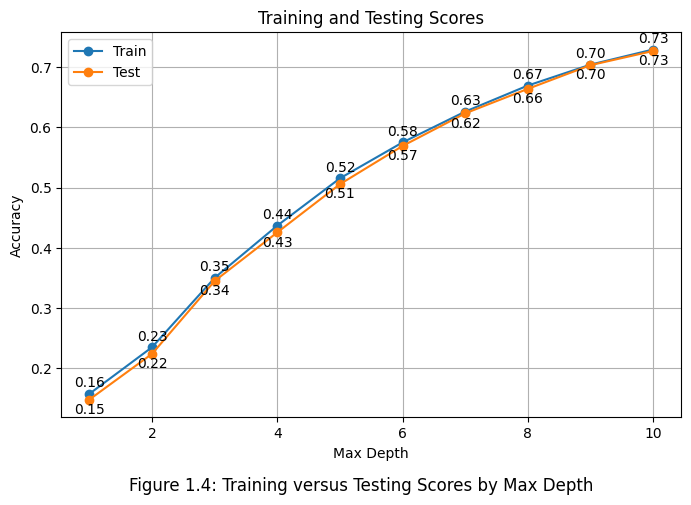

In [ ]:
# Evaluate the decision tree model based on each max depth
train_scores = []
test_scores = []

for depth in range(1, 11):
    tree = DecisionTreeClassifier(max_depth=depth)
    tree.fit(X_train, y_train)
    train_scores.append(tree.score(X_train, y_train))
    test_scores.append(tree.score(X_test, y_test))

# Plot the training and testing scores
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), train_scores, label='Train', marker='o')
plt.plot(range(1, 11), test_scores, label='Test', marker='o')

# Annotate each point with its accuracy
for i, (train_score, test_score) in enumerate(zip(train_scores, test_scores), start=1):
    plt.annotate(f'{train_score:.2f}', (i, train_score), textcoords="offset points", xytext=(0, 5), ha='center')  # Above the point-train
    plt.annotate(f'{test_score:.2f}', (i, test_score), textcoords="offset points", xytext=(0, -10), ha='center')  # Below the point-test
# Add a suptitle below the figure
plt.gcf().suptitle("Figure 1.4: Training versus Testing Scores by Max Depth",
                   fontsize=12, y=-0.01, ha='center', color='black')  # Adjust `y` for placement below

plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Training and Testing Scores')
plt.legend()
plt.grid()
plt.show()

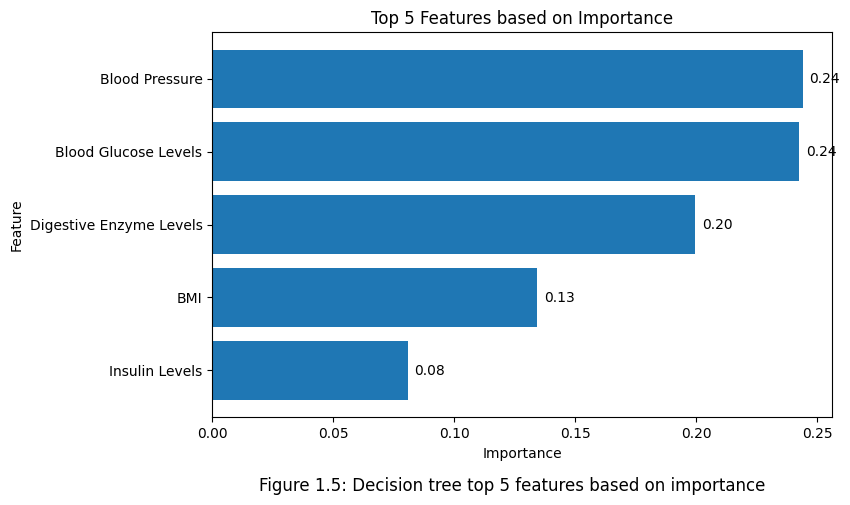

In [ ]:
# Show the top 5 features based on importance
feature_importances = best_tree.feature_importances_
feature_importances_df = pd.DataFrame({'Feature': features.columns, 'Importance': feature_importances})
feature_importances_df = feature_importances_df.sort_values('Importance', ascending=False)

# Plot the top 5 features based on importance
plt.figure(figsize=(8, 5))
bars = plt.barh(feature_importances_df['Feature'][:5], feature_importances_df['Importance'][:5])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 5 Features based on Importance')
plt.gca().invert_yaxis()  # Show the highest importance at the top

# Annotate each bar with the importance value
for bar in bars:
    plt.annotate(f'{bar.get_width():.2f}',
                 xy=(bar.get_width(), bar.get_y() + bar.get_height() / 2),
                 xytext=(5, 0),  # 5 points horizontal offset
                 textcoords='offset points',
                 ha='left', va='center')
# Add a suptitle below the figure
plt.gcf().suptitle("Figure 1.5: Decision tree top 5 features based on importance",
                   fontsize=12, y=-0.01, ha='center', color='black')  # Adjust `y` for placement below

plt.show()

                                            precision    recall  f1-score   support

   Cystic Fibrosis-Related Diabetes (CFRD)       0.83      0.45      0.59      1070
                      Gestational Diabetes       0.53      0.76      0.62      1072
                                      LADA       0.65      0.38      0.48      1072
                                      MODY       0.75      0.67      0.71      1194
          Neonatal Diabetes Mellitus (NDM)       1.00      1.00      1.00      1018
                               Prediabetic       0.89      1.00      0.94      1089
                        Secondary Diabetes       0.57      0.59      0.58      1053
                  Steroid-Induced Diabetes       0.90      0.30      0.45      1048
                           Type 1 Diabetes       0.75      0.97      0.85      1123
                           Type 2 Diabetes       0.77      0.67      0.71      1083
Type 3c Diabetes (Pancreatogenic Diabetes)       0.53      1.00      0.70  

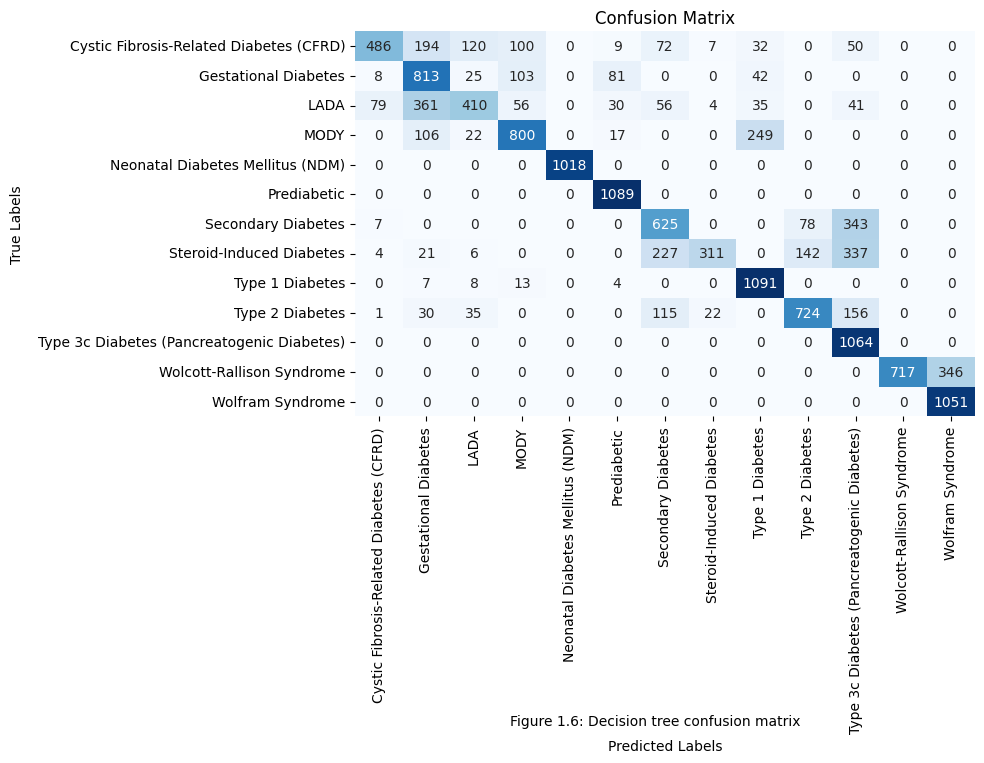

In [ ]:

# Predict the target values
y_pred = best_tree.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

# Extract the actual labels from y_test
actual_labels = sorted(set(y_test))

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=actual_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=actual_labels, yticklabels=actual_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels', labelpad=10)
plt.title('Confusion Matrix')

# Add a suptitle below the figure
# Adding a figure caption
plt.figtext(0.5, -0.5, 'Figure 1.6: Decision tree confusion matrix', ha='center', va='center', fontsize=10)

plt.show()

In [ ]:
print(classification_report(y_train, best_tree.predict(X_train))) #training sest
print(classification_report(y_test, best_tree.predict(X_test))) #testing set

                                            precision    recall  f1-score   support

   Cystic Fibrosis-Related Diabetes (CFRD)       0.86      0.43      0.57      4394
                      Gestational Diabetes       0.55      0.75      0.63      4272
                                      LADA       0.63      0.39      0.48      4151
                                      MODY       0.72      0.70      0.71      4359
          Neonatal Diabetes Mellitus (NDM)       1.00      1.00      1.00      4390
                               Prediabetic       0.87      1.00      0.93      4287
                        Secondary Diabetes       0.58      0.58      0.58      4426
                  Steroid-Induced Diabetes       0.88      0.29      0.44      4227
                           Type 1 Diabetes       0.77      0.96      0.86      4323
                           Type 2 Diabetes       0.76      0.69      0.72      4314
Type 3c Diabetes (Pancreatogenic Diabetes)       0.53      1.00      0.69  

### Logistic Regression

In [ ]:
#encoding target variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
target_encoded = le.fit_transform(target)
print(target_encoded)

[7 4 5 ... 8 0 2]


In [ ]:
# Print the encoded target labels
print("Encoded Target Labels:")
print(target_encoded)

# Print the mapping of original labels to encoded labels
print("\nOriginal Labels to Encoded Labels Mapping:")
for original, encoded in zip(le.classes_, range(len(le.classes_))):
    print(f'{original}: {encoded}')

Encoded Target Labels:
[7 4 5 ... 8 0 2]

Original Labels to Encoded Labels Mapping:
Cystic Fibrosis-Related Diabetes (CFRD): 0
Gestational Diabetes: 1
LADA: 2
MODY: 3
Neonatal Diabetes Mellitus (NDM): 4
Prediabetic: 5
Secondary Diabetes: 6
Steroid-Induced Diabetes: 7
Type 1 Diabetes: 8
Type 2 Diabetes: 9
Type 3c Diabetes (Pancreatogenic Diabetes): 10
Wolcott-Rallison Syndrome: 11
Wolfram Syndrome: 12


In [ ]:
from sklearn.linear_model import LogisticRegression as LogisticClassification
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Encode target variables
label_encoder = LabelEncoder()
y_train_encode = label_encoder.fit_transform(y_train)
y_test_encode = label_encoder.transform(y_test)

#standardize values to even out the weight of each predictor
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg_model = LogisticClassification()
log_reg_model.fit(X_train_scaled, y_train_encode)

y_pred = log_reg_model.predict(X_test_scaled)

mse = mean_squared_error(y_test_encode, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 4.288


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.54      0.55      0.54      4394
           1       0.39      0.31      0.35      4272
           2       0.46      0.42      0.44      4151
           3       0.58      0.61      0.60      4359
           4       0.99      0.99      0.99      4390
           5       0.60      0.70      0.65      4287
           6       0.51      0.48      0.50      4426
           7       0.41      0.37      0.39      4227
           8       0.76      0.83      0.80      4323
           9       0.63      0.69      0.66      4314
          10       0.53      0.54      0.53      4256
          11       0.77      0.77      0.77      4337
          12       0.78      0.77      0.78      4264

    accuracy                           0.62     56000
   macro avg       0.61      0.62      0.61     56000
weighted avg       0.61      0.62      0.62     56000

              precision    recall  f1-score   support

           0       0.53 

Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression')

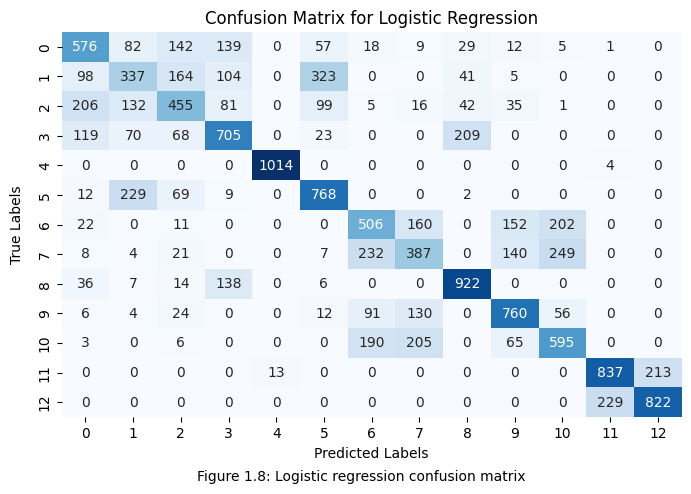

In [ ]:
#evaluate model on training and testing

print(classification_report(y_train_encode, log_reg_model.predict(X_train_scaled))) #training sest
print(classification_report(y_test_encode, log_reg_model.predict(X_test_scaled))) #testing set

# Extract the actual labels from y_test
actual_labels = sorted(set(y_test_encode))

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test_encode, y_pred, labels=actual_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=actual_labels, yticklabels=actual_labels)
plt.xlabel('Predicted Labels')
# Adding a figure caption
plt.figtext(0.5, -0.01, 'Figure 1.8: Logistic regression confusion matrix', ha='center', va='center', fontsize=10)
plt.ylabel('True Labels', labelpad=10)
plt.title('Confusion Matrix for Logistic Regression')


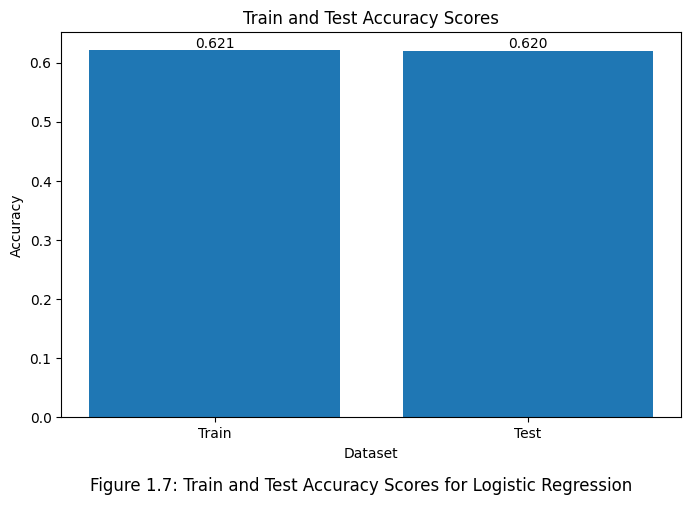

In [ ]:
#plot the train and test accuracy score
train_score_lg = log_reg_model.score(X_train_scaled, y_train_encode)
test_score_lg = log_reg_model.score(X_test_scaled, y_test_encode)

plt.figure(figsize=(8, 5))
plt.bar(['Train', 'Test'], [train_score_lg, test_score_lg])
plt.xlabel('Dataset')
plt.ylabel('Accuracy')

# Annotate each bar with the accuracy value
for i, score in enumerate([train_score_lg, test_score_lg]):
    plt.text(i, score, f'{score:.3f}', ha='center', va='bottom')

# Add a suptitle below the figure
plt.gcf().suptitle("Figure 1.7: Train and Test Accuracy Scores for Logistic Regression",
                   fontsize=12, y=-0.01, ha='center', color='black')  # Adjust `y` for placement below
plt.title('Train and Test Accuracy Scores')
plt.show()

### Random Forest

                                            precision    recall  f1-score   support

   Cystic Fibrosis-Related Diabetes (CFRD)       0.88      0.61      0.72      4394
                      Gestational Diabetes       0.65      0.66      0.66      4272
                                      LADA       0.81      0.47      0.60      4151
                                      MODY       0.73      0.78      0.75      4359
          Neonatal Diabetes Mellitus (NDM)       1.00      1.00      1.00      4390
                               Prediabetic       0.79      1.00      0.88      4287
                        Secondary Diabetes       0.75      0.67      0.71      4426
                  Steroid-Induced Diabetes       0.78      0.62      0.69      4227
                           Type 1 Diabetes       0.75      0.99      0.86      4323
                           Type 2 Diabetes       0.93      0.68      0.79      4314
Type 3c Diabetes (Pancreatogenic Diabetes)       0.62      1.00      0.76  

Text(0.5, 1.0, 'Confusion Matrix for Random Forest')

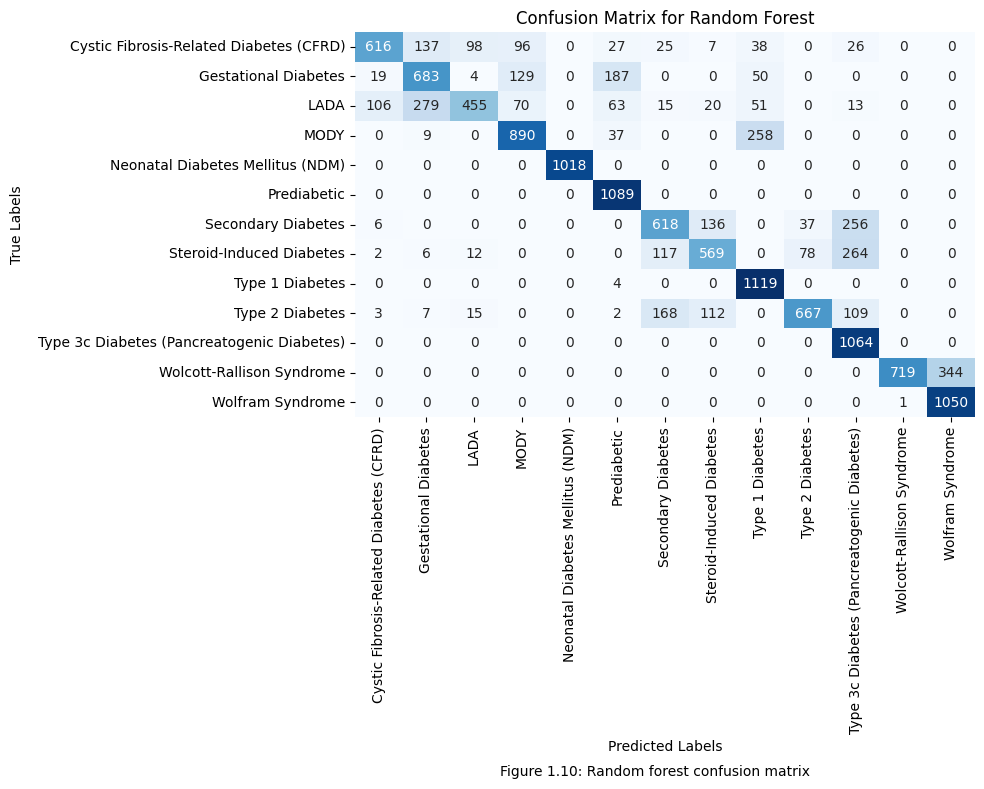

In [ ]:
# #random forst
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier grid search
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)
rf_model.fit(X_train, y_train)

# Predict the target values
y_pred = rf_model.predict(X_test)

# Print the classification report for train
print(classification_report(y_train, rf_model.predict(X_train)))

# Print the classification report for test
print(classification_report(y_test, y_pred))


# Extract the actual labels from y_test
actual_labels = sorted(set(y_test))

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=actual_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=actual_labels, yticklabels=actual_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels', labelpad=10)
# Adding a figure caption
plt.figtext(0.5, -0.6, 'Figure 1.10: Random forest confusion matrix', ha='center', va='center', fontsize=10)
plt.title('Confusion Matrix for Random Forest')


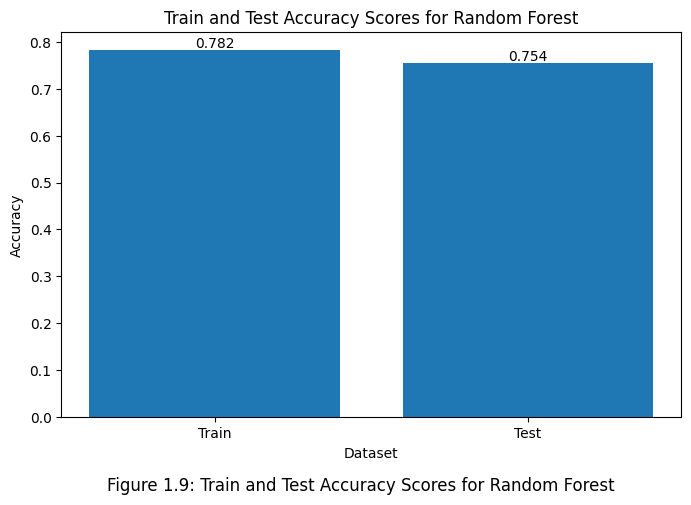

In [ ]:
#plotting the accuracy scores
train_score_rf = rf_model.score(X_train, y_train)
test_score_rf = rf_model.score(X_test, y_test)

plt.figure(figsize=(8, 5))
plt.bar(['Train', 'Test'], [train_score_rf, test_score_rf])
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
# Annotate each bar with the accuracy value
for i, score in enumerate([train_score_rf, test_score_rf]):
    plt.text(i, score, f'{score:.3f}', ha='center', va='bottom')

# Add a suptitle below the figure
plt.gcf().suptitle("Figure 1.9: Train and Test Accuracy Scores for Random Forest",
                   fontsize=12, y=-0.01, ha='center', color='black')  # Adjust `y` for placement below
plt.title('Train and Test Accuracy Scores for Random Forest')
plt.show()

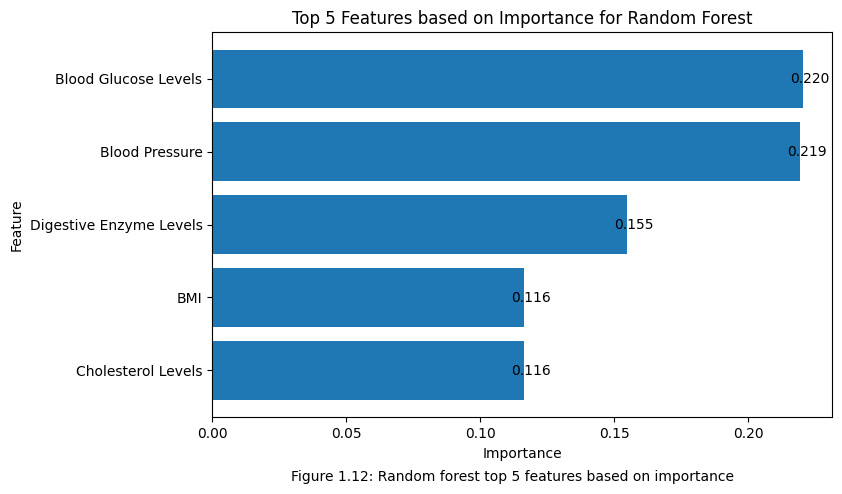

In [ ]:
#feature importance
feature_importances = rf_model.feature_importances_

# Create a DataFrame to store the feature importances
feature_importances_df = pd.DataFrame({'Feature': features.columns, 'Importance': feature_importances})
feature_importances_df = feature_importances_df.sort_values('Importance', ascending=False)

# Plot the top 5 features based on importance
plt.figure(figsize=(8, 5))
bars = plt.barh(feature_importances_df['Feature'][:5], feature_importances_df['Importance'][:5])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 5 Features based on Importance for Random Forest')
# Annotate each bar with the importance value
for bar in bars:
    plt.annotate(f'{bar.get_width():.3f}',
                 xy=(bar.get_width(), bar.get_y() + bar.get_height() / 2),
                 xytext=(5, 0),  # 5 points horizontal offset
                 textcoords='offset points',
                 ha='center', va='center')
plt.gca().invert_yaxis()  # Show the highest importance at the top
#addding a figure caption
plt.figtext(0.5, -0.01, 'Figure 1.12: Random forest top 5 features based on importance', ha='center', va='center', fontsize=10)
plt.show()


### Gradient Boosting

                                            precision    recall  f1-score   support

   Cystic Fibrosis-Related Diabetes (CFRD)       0.92      0.63      0.75      4394
                      Gestational Diabetes       0.67      0.74      0.71      4272
                                      LADA       0.78      0.59      0.67      4151
                                      MODY       0.73      0.80      0.76      4359
          Neonatal Diabetes Mellitus (NDM)       1.00      1.00      1.00      4390
                               Prediabetic       0.88      1.00      0.94      4287
                        Secondary Diabetes       0.80      0.69      0.74      4426
                  Steroid-Induced Diabetes       0.89      0.63      0.73      4227
                           Type 1 Diabetes       0.77      1.00      0.87      4323
                           Type 2 Diabetes       0.91      0.79      0.85      4314
Type 3c Diabetes (Pancreatogenic Diabetes)       0.66      0.98      0.79  

Text(0.5, 1.0, 'Confusion Matrix for Gradient Boosting')

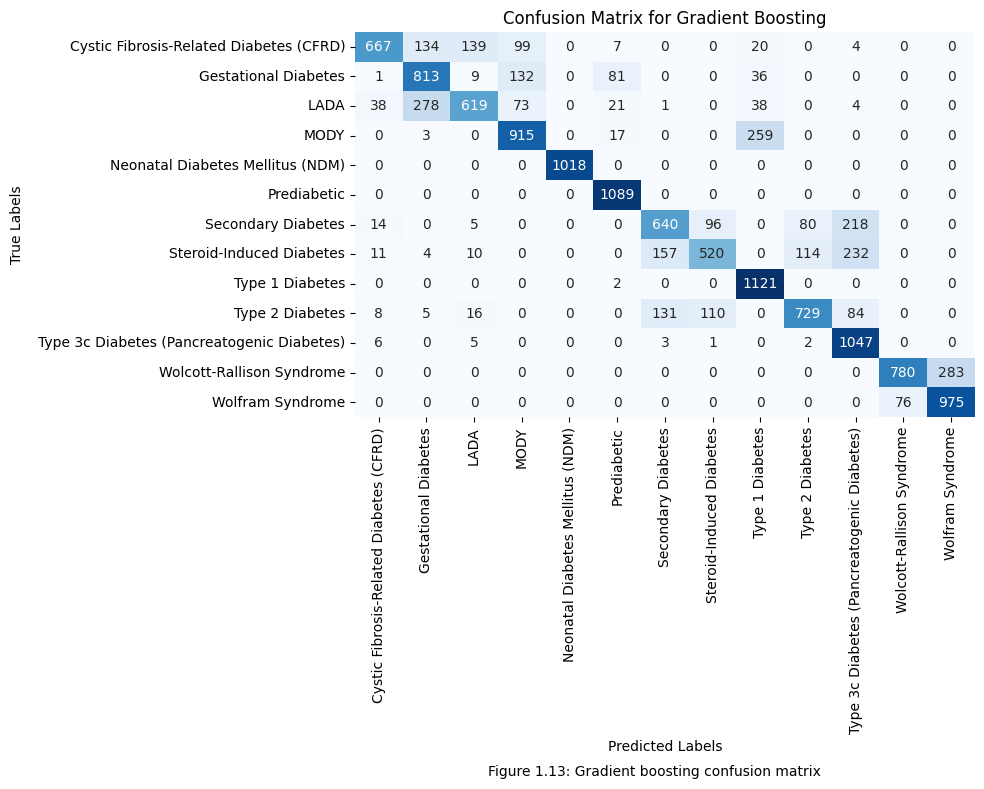

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

xgb_model = GradientBoostingClassifier(learning_rate=0.02, n_estimators=100, random_state=42, max_depth=10, min_samples_split=2, min_samples_leaf=1)

# Fit the model
xgb_model.fit(X_train, y_train)

# Predict the target values
y_pred = xgb_model.predict(X_test)

# Print the classification report for train
print(classification_report(y_train, xgb_model.predict(X_train)))

# Print the classification report for test
print(classification_report(y_test, y_pred))

# Extract the actual labels from y_test
actual_labels = sorted(set(y_test))

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=actual_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=actual_labels, yticklabels=actual_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels', labelpad=10)
# Adding a figure caption
plt.figtext(0.5, -0.6, 'Figure 1.13: Gradient boosting confusion matrix', ha='center', va='center', fontsize=10)
plt.title('Confusion Matrix for Gradient Boosting')



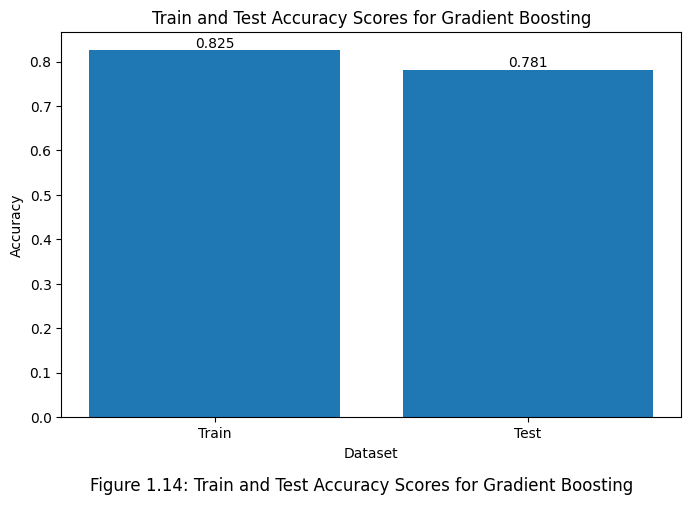

In [ ]:
#accuracy scores
train_score_xgb = xgb_model.score(X_train, y_train)
test_score_xgb = xgb_model.score(X_test, y_test)

plt.figure(figsize=(8, 5))
plt.bar(['Train', 'Test'], [train_score_xgb, test_score_xgb])
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
# Annotate each bar with the accuracy value
for i, score in enumerate([train_score_xgb, test_score_xgb]):
    plt.text(i, score, f'{score:.3f}', ha='center', va='bottom')

# Add a suptitle below the figure
plt.gcf().suptitle("Figure 1.14: Train and Test Accuracy Scores for Gradient Boosting",
                   fontsize=12, y=-0.01, ha='center', color='black')  # Adjust `y` for placement below

plt.title('Train and Test Accuracy Scores for Gradient Boosting')
plt.show()

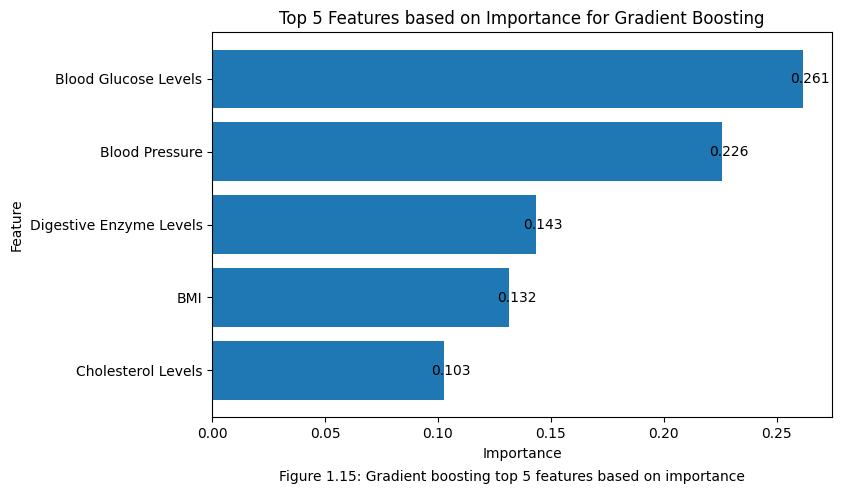

In [ ]:
#feature importance
feature_importances = xgb_model.feature_importances_

# Create a DataFrame to store the feature importances
feature_importances_df = pd.DataFrame({'Feature': features.columns, 'Importance': feature_importances})
feature_importances_df = feature_importances_df.sort_values('Importance', ascending=False)

# Plot the top 5 features based on importance
plt.figure(figsize=(8, 5))
bars = plt.barh(feature_importances_df['Feature'][:5], feature_importances_df['Importance'][:5])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 5 Features based on Importance for Gradient Boosting')
#setting the figure caption
plt.figtext(0.5, -0.01, 'Figure 1.15: Gradient boosting top 5 features based on importance', ha='center', va='center', fontsize=10)
# Annotate each bar with the importance value
for bar in bars:
    plt.annotate(f'{bar.get_width():.3f}',
                 xy=(bar.get_width(), bar.get_y() + bar.get_height() / 2),
                 xytext=(5, 0),  # 5 points horizontal offset
                 textcoords='offset points',
                 ha='center', va='center')
plt.gca().invert_yaxis()  # Show the highest importance at the top
plt.show()

### Neural Network

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
import torch.utils.data as data


In [ ]:
#creating tensors for the data
x_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_encode, dtype=torch.int64)
x_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_encode, dtype=torch.int64)

In [ ]:
#determine thhe number of classes
num_classes = len(set(y_train_encode))
print(num_classes)

13


In [ ]:
#creating tensor datasets
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
test_dataset = TensorDataset(x_test_tensor, y_test_tensor)

In [ ]:
#dfine train and test loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [ ]:
#implement neural network
class neural_network(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, hidden_size3, output_size):
        super(neural_network, self).__init__()

        self.network = nn.Sequential(
            nn.Linear(input_size, hidden_size1),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(hidden_size1, hidden_size2),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(hidden_size2, hidden_size3),
            nn.ReLU(),
            nn.Linear(hidden_size3, output_size),
            nn.Softmax(dim=1)
        )

    def forward(self, input_data):
        output = self.network(input_data)
        return output

In [ ]:

# Define the input size based on the training data
input_size = x_train_tensor.shape[1]
hidden_size1 = 128
hidden_size2 = 64
hidden_size3 = 32
output_size = num_classes  # Set output size to the number of unique classes


#initiate the model
model = neural_network(
    input_size=input_size,
    hidden_size1=hidden_size1,
    hidden_size2=hidden_size2,
    hidden_size3=hidden_size3,
    output_size=output_size
)

dataset = TensorDataset(x_train_tensor, y_train_tensor)
train_loader = DataLoader(dataset, batch_size=64, shuffle=True)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# Training loop
def training_loop(n_epochs, optimizer, model, loss_fn, train_loader):
    for epoch in range(n_epochs):
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)
            loss.backward()
            optimizer.step()
        print(f"Epoch {epoch+1}, Loss: {loss.item()}")

In [ ]:
# Run the training loop
training_loop(
    n_epochs=50,
    optimizer=optimizer,
    model=model,
    loss_fn=criterion,
    train_loader=train_loader
)

Epoch 1, Loss: 2.137021064758301
Epoch 2, Loss: 2.2018191814422607
Epoch 3, Loss: 2.0729973316192627
Epoch 4, Loss: 2.1699752807617188
Epoch 5, Loss: 2.231661796569824
Epoch 6, Loss: 2.129641532897949
Epoch 7, Loss: 2.149998188018799
Epoch 8, Loss: 2.012063980102539
Epoch 9, Loss: 2.125178813934326
Epoch 10, Loss: 2.0336620807647705
Epoch 11, Loss: 2.0433928966522217
Epoch 12, Loss: 2.0835583209991455
Epoch 13, Loss: 2.086348533630371
Epoch 14, Loss: 2.04491925239563
Epoch 15, Loss: 2.10493540763855
Epoch 16, Loss: 2.0152499675750732
Epoch 17, Loss: 2.1427414417266846
Epoch 18, Loss: 2.095802068710327
Epoch 19, Loss: 2.086387872695923
Epoch 20, Loss: 1.988830804824829
Epoch 21, Loss: 1.9439606666564941
Epoch 22, Loss: 2.0766823291778564
Epoch 23, Loss: 2.058086395263672
Epoch 24, Loss: 2.141756772994995
Epoch 25, Loss: 2.052940607070923
Epoch 26, Loss: 2.115417242050171
Epoch 27, Loss: 2.051356077194214
Epoch 28, Loss: 2.110696315765381
Epoch 29, Loss: 2.0216455459594727
Epoch 30, Loss

In [ ]:
def train_and_validate(model, train_loader, val_loader, criterion, optimizer, n_epochs=50):
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    for epoch in range(n_epochs):
        model.train()
        train_loss = 0.0
        train_correct = 0
        train_total = 0

        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            train_total += labels.size(0)
            train_correct += (predicted == labels).sum().item()

        model.eval()
        val_loss = 0.0
        val_correct = 0
        val_total = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

                _, predicted = torch.max(outputs.data, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()

        avg_train_loss = train_loss / len(train_loader)
        avg_val_loss = val_loss / len(val_loader)
        train_accuracy = 100 * train_correct / train_total
        val_accuracy = 100 * val_correct / val_total

        train_losses.append(avg_train_loss)
        val_losses.append(avg_val_loss)
        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)

        if epoch % 10 == 0:
            print(f'Epoch {epoch}:')
            print(f'Train Loss: {avg_train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%')
            print(f'Test Loss: {avg_val_loss:.4f}, Test Accuracy: {val_accuracy:.2f}%')

    return train_losses, val_losses, train_accuracies, val_accuracies

In [ ]:
total_size = len(X_train)
train_size = int(0.8 * total_size)
val_size = total_size - train_size

train_dataset, val_dataset = random_split(
    TensorDataset(x_train_tensor, y_train_tensor),
    [train_size, val_size]
)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

model = neural_network(
    input_size=x_train_tensor.shape[1],
    hidden_size1 = 128,
    hidden_size2 = 64,
    hidden_size3 = 32,
    output_size=len(torch.unique(y_train_tensor))
)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_losses, val_losses, train_accuracies, val_accuracies = train_and_validate(
    model, train_loader, val_loader, criterion, optimizer
)

Epoch 0:
Train Loss: 2.2927, Train Accuracy: 39.67%
Test Loss: 2.2089, Test Accuracy: 47.96%
Epoch 10:
Train Loss: 2.1609, Train Accuracy: 52.75%
Test Loss: 2.1510, Test Accuracy: 53.72%
Epoch 20:
Train Loss: 2.1314, Train Accuracy: 55.75%
Test Loss: 2.1175, Test Accuracy: 57.09%
Epoch 30:
Train Loss: 2.1168, Train Accuracy: 57.15%
Test Loss: 2.1020, Test Accuracy: 58.62%
Epoch 40:
Train Loss: 2.1055, Train Accuracy: 58.32%
Test Loss: 2.0958, Test Accuracy: 59.29%


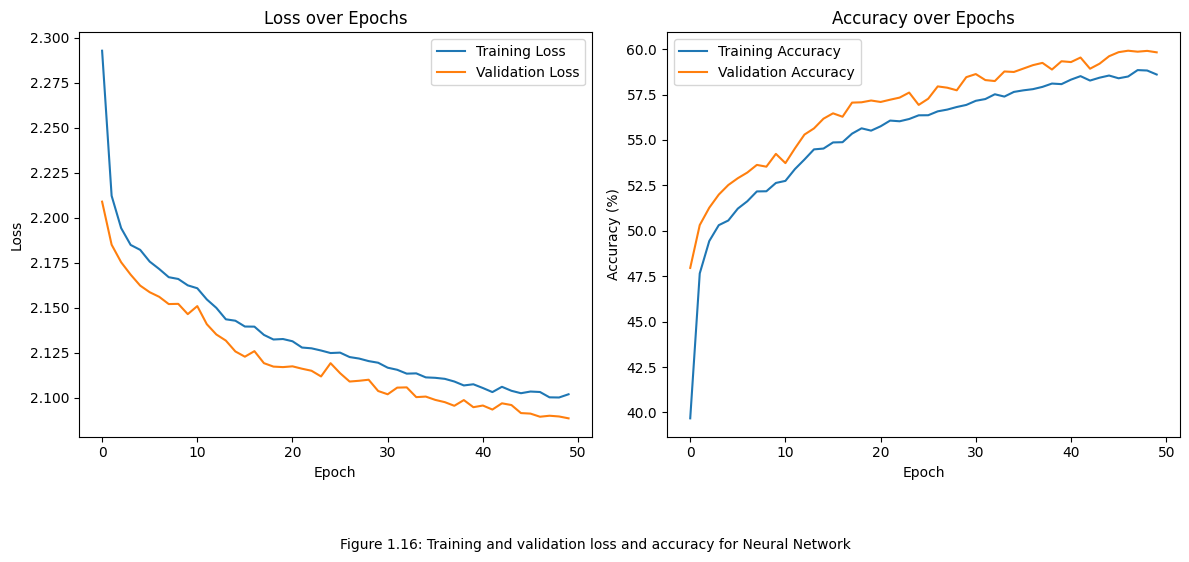

In [ ]:
# visualization
plt.figure(figsize=(12,5))

# Loss plot
plt.subplot(1,2,1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1,2,2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

#add a figure caption
plt.figtext(0.5, -0.1, 'Figure 1.16: Training and validation loss and accuracy for Neural Network', ha='center', va='center', fontsize=10)

plt.tight_layout()
plt.show()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

              precision    recall  f1-score   support

           0       0.65      0.54      0.59      1070
           1       0.57      0.49      0.52      1072
           2       0.58      0.48      0.53      1072
           3       0.42      0.88      0.57      1194
           4       0.71      1.00      0.83      1018
           5       0.73      0.95      0.82      1089
           6       0.64      0.40      0.50      1053
           7       0.59      0.47      0.53      1048
           8       0.00      0.00      0.00      1123
           9       0.71      0.69      0.70      1083
          10       0.55      0.85      0.67      1064
          11       0.00      0.00      0.00      1063
          12       0.61      0.99      0.75      1051

    accuracy                           0.60     14000
   macro avg       0.52      0.60      0.54     14000
weighted avg       0.52      0.60      0.54     14000



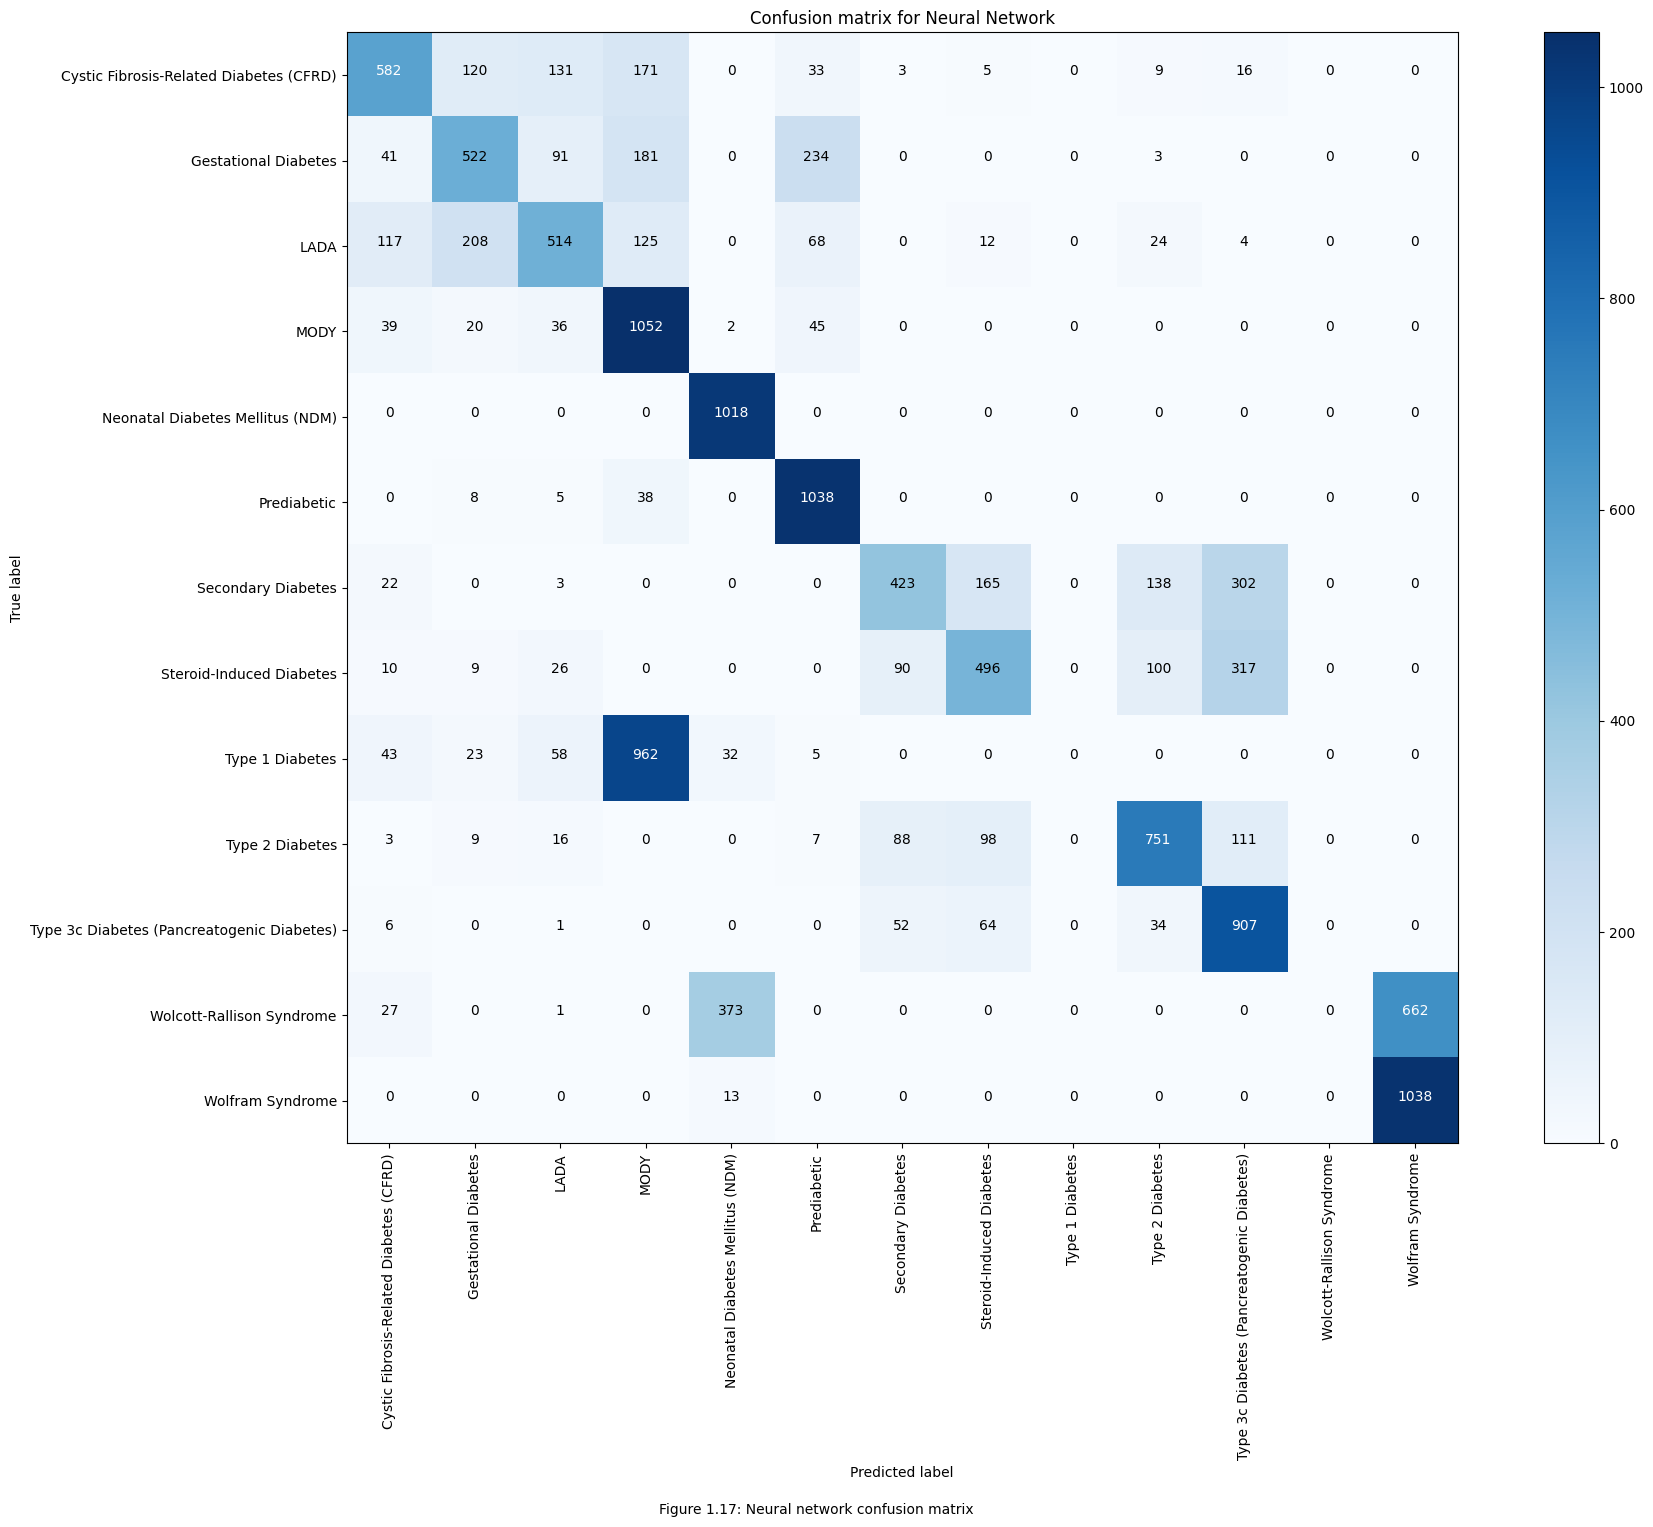

In [ ]:
#plot confusion matrix for neural net
import itertools
def plot_confusion_matrix(y_true, y_pred, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(20, 15))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

        # Adding a figure caption
    plt.figtext(0.5, -0.01, 'Figure 1.17: Neural network confusion matrix', ha='center', va='center', fontsize=10)

    plt.show()

#predict the target values
y_pred = model(x_test_tensor).argmax(dim=1)

# Print the classification report
print(classification_report(y_test_tensor, y_pred))

#display confusion matrix
plot_confusion_matrix(y_test_encode, y_pred, classes=label_encoder.classes_, title='Confusion matrix for Neural Network')


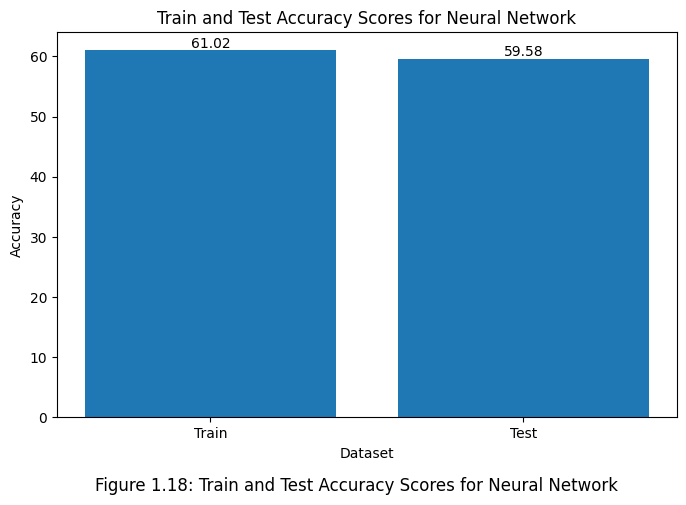

In [ ]:
#plotting the accuracy scores
train_score_nn = 100 * (y_train_tensor == model(x_train_tensor).argmax(dim=1)).sum().item() / len(y_train_tensor)
test_score_nn = 100 * (y_test_tensor == model(x_test_tensor).argmax(dim=1)).sum().item() / len(y_test_tensor)

plt.figure(figsize=(8, 5))
plt.bar(['Train', 'Test'], [train_score_nn, test_score_nn])
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
# Annotate each bar with the accuracy value
for i, score in enumerate([train_score_nn, test_score_nn]):
    plt.text(i, score, f'{score:.2f}', ha='center', va='bottom')

# Add a suptitle below the figure
plt.gcf().suptitle("Figure 1.18: Train and Test Accuracy Scores for Neural Network",
                   fontsize=12, y=-0.01, ha='center', color='black')  # Adjust `y` for placement below

plt.title('Train and Test Accuracy Scores for Neural Network')
plt.show()

In [ ]:
#convert the neural network accuracy scores to decimal
train_score_nn = train_score_nn/100
test_score_nn = test_score_nn/100

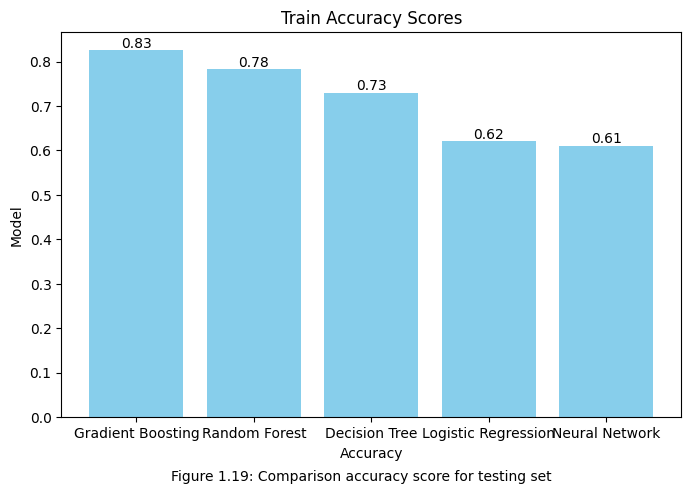

In [ ]:


#compile all accuracy score in one table
accuracy_scores = pd.DataFrame({
    'Model': ['Decision Tree', 'Logistic Regression', 'Random Forest', 'Gradient Boosting', 'Neural Network'],
    'Train Accuracy': [train_score, train_score_lg, train_score_rf, train_score_xgb, train_score_nn],
    'Test Accuracy': [test_score, test_score_lg, test_score_rf, test_score_xgb, test_score_nn]
})

# print(accuracy_scores)

#sort the accuracy scores
accuracy_scores = accuracy_scores.sort_values('Train Accuracy', ascending=False)
# print(accuracy_scores)

#plotting the accuracy scores based on training score
plt.figure(figsize=(8, 5))
bars = plt.bar(accuracy_scores['Model'], accuracy_scores['Train Accuracy'], color='skyblue')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.title('Train Accuracy Scores')

# Annotate each bar with the accuracy value
for i, score in enumerate(accuracy_scores['Train Accuracy']):
    plt.text(i, score, f'{score:.2f}', ha='center', va='bottom')
# Adding a figure caption
plt.figtext(0.5, -0.01, 'Figure 1.19: Comparison accuracy score for testing set', ha='center', va='center', fontsize=10)
plt.show()


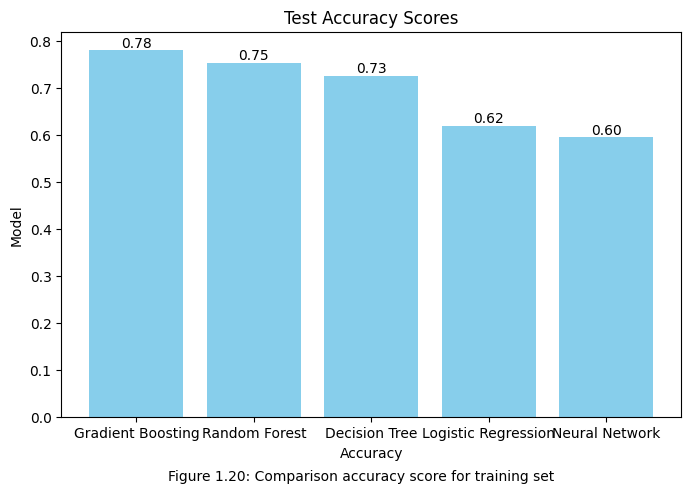

In [ ]:
#
#sort the accuracy scores
accuracy_scores = accuracy_scores.sort_values('Test Accuracy', ascending=False)
# print(accuracy_scores)

#plotting the accuracy scores based on training score
plt.figure(figsize=(8, 5))
bars = plt.bar(accuracy_scores['Model'], accuracy_scores['Test Accuracy'], color='skyblue')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.title('Test Accuracy Scores')

# Annotate each bar with the accuracy value
for i, score in enumerate(accuracy_scores['Test Accuracy']):
    plt.text(i, score, f'{score:.2f}', ha='center', va='bottom')
# Adding a figure caption
plt.figtext(0.5, -0.01, 'Figure 1.20: Comparison accuracy score for training set', ha='center', va='center', fontsize=10)
plt.show()

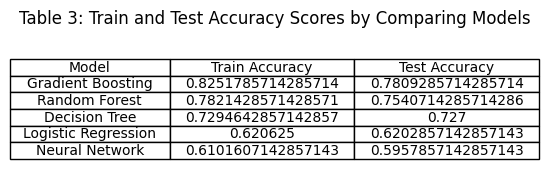

In [ ]:
#display train and test accuracy scores in a table
#add a table title/caption
plt.figure(figsize=(6, 2))
plt.axis('off')
table = plt.table(cellText=accuracy_scores.values,
                  colLabels=accuracy_scores.columns,
                  cellLoc='center',
                  loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(accuracy_scores.columns))))
plt.title('Table 3: Train and Test Accuracy Scores by Comparing Models')
plt.show()


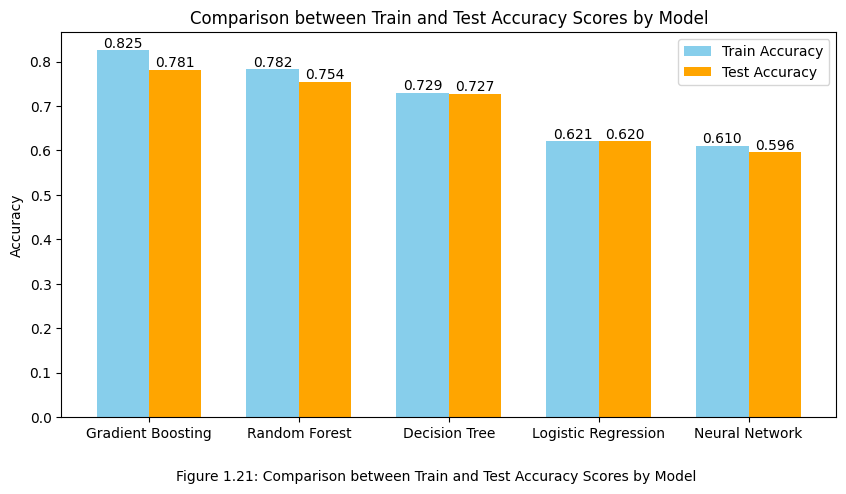

In [ ]:
#display training and testing accuracy scores in a bar chart side by side
fig, ax = plt.subplots(figsize=(10, 5))

# Set the bar width
bar_width = 0.35

# Set the bar positions
train_positions = np.arange(len(accuracy_scores))
test_positions = train_positions + bar_width

# Plot the training accuracy bars
train_bars = ax.bar(train_positions, accuracy_scores['Train Accuracy'], bar_width, label='Train Accuracy', color='skyblue')

# Plot the testing accuracy bars
test_bars = ax.bar(test_positions, accuracy_scores['Test Accuracy'], bar_width, label='Test Accuracy', color='orange')

# Set the x-axis ticks
ax.set_xticks(train_positions + bar_width / 2)
ax.set_xticklabels(accuracy_scores['Model'])

# Set the y-axis label
ax.set_ylabel('Accuracy')

# Set the chart title
ax.set_title('Comparison between Train and Test Accuracy Scores by Model')

# Set the legend
ax.legend()

# Annotate each bar with the accuracy value
for bars in [train_bars, test_bars]:
    for bar in bars:
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.3f}', ha='center', va='bottom')


# Adding a figure caption
plt.figtext(0.5, -0.01, 'Figure 1.21: Comparison between Train and Test Accuracy Scores by Model', ha='center', va='center', fontsize=10)
plt.show()